In [1]:
# Import Package yang dibutuhkan
import numpy as np 
import pandas as pd 
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold 


In [2]:
# Menampilkan data
df = pd.read_csv('data.csv', sep=';')
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [3]:
# Ukuran dataset
df.shape

(4424, 37)

In [4]:
# Menampilkan nama-nama kolom pada dataset ini
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [5]:
# Menampilkan jenis tipe data pada setiap kolom
df.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

### Encoding Kolom Target

In [6]:
# Melakukan encoding pada kolom Target agar bisa dilakukan prediksi
df['Target'] = df['Target'].replace({'Dropout': 0, 'Graduate': 1, 'Enrolled':2}) 

In [7]:
# Drop baris yang kolom "Target" nya memiliki value 'Enrolled' karena kita ingin memprediksi apakah student Dropout atau Graduate. Maka, value Enrolled tidak dibutuhkan
df.drop(df[df['Target'] == 2].index, inplace = True)

In [8]:
# Memastikan bahwa tipe datanya bukan object
df['Target'].value_counts()

1    2209
0    1421
Name: Target, dtype: int64

In [9]:
# Jumlah setiap value di kolom Target
df['Target'] = df['Target'].astype('int')

<function matplotlib.pyplot.show(close=None, block=None)>

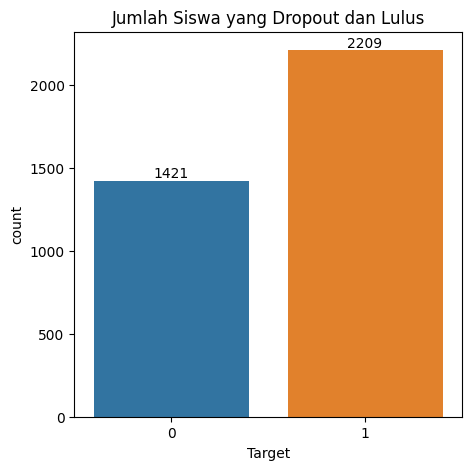

In [10]:
# Mengecek jumlah siswa yang dropout dan lulus 
plt.figure(figsize = (5,5))
ax = sns.countplot(data = df, x = 'Target')

# Untuk menampilkan nilai detail di atas bar
for i in ax.containers:
    ax.bar_label(i,)

plt.title('Jumlah Siswa yang Dropout dan Lulus')
plt.show

Tampak bahwa jumlah siswa yang lulus jauh lebih banyak daripada jumlah siswa yang dropout

In [11]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


### Encoding Kolom Target

In [12]:
# Melakukan encoding pada kolom Target agar bisa dilakukan prediksi
df['Target'] = df['Target'].replace({'Dropout': 0, 'Graduate': 1, 'Enrolled':2}) 

In [13]:
# Drop baris yang kolom "Target" nya memiliki value 'Enrolled' karena kita ingin memprediksi apakah student Dropout atau Graduate. Maka, value Enrolled tidak dibutuhkan
df.drop(df[df['Target'] == 2].index, inplace = True)

In [14]:
# Memastikan bahwa tipe datanya bukan object
df['Target'].value_counts()

1    2209
0    1421
Name: Target, dtype: int64

In [15]:
# Jumlah setiap value di kolom Target
df['Target'] = df['Target'].astype('int')

<function matplotlib.pyplot.show(close=None, block=None)>

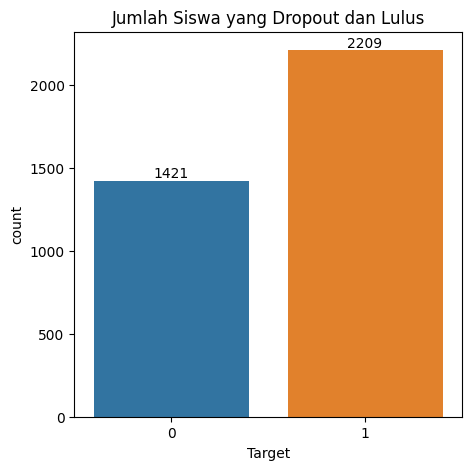

In [16]:
# Mengecek jumlah siswa yang dropout dan lulus 
plt.figure(figsize = (5,5))
ax = sns.countplot(data = df, x = 'Target')

# Untuk menampilkan nilai detail di atas bar
for i in ax.containers:
    ax.bar_label(i,)

plt.title('Jumlah Siswa yang Dropout dan Lulus')
plt.show

Tampak bahwa jumlah siswa yang lulus jauh lebih banyak daripada jumlah siswa yang dropout

In [17]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


# **Modelling**
#### Membagi data menjadi X dan y
#### X adalah feature-feature yang digunakan
#### y adalah kolom yang akan kita prediksi, yaitu Target

In [18]:
# Memisahkan variabel independen (X) dengan variabel dependen (y)
X = df[['Marital status', 'GDP', 'Curricular units 1st sem (credited)', 'Age at enrollment', 'Scholarship holder', 
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)']]
# X = df.drop(['Target'], axis = 1)
y = df['Target']

print(X.shape)
print(y.shape)

(3630, 16)
(3630,)


#### Melakukan Standarisasi

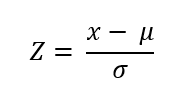

In [19]:
# Fungsi untuk melakukan standarisasi
# Penjelasan parameter:
# df: dataframe yang akan distandarisasi
def standarisasi(df):
    return (df - df.mean()) / df.std()

In [20]:
# Melakukan standarisasi pada setiap feature di X
X = standarisasi(X)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 92)

In [22]:
# Inisiasi array kosong untuk menampung rata-rata akurasi prediksi dari tiap model
avg_train_arr = []
avg_test_arr = []

In [23]:
# Fungsi untuk menghitung akurasi
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [24]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

model = CatBoostClassifier()

param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],  
    'depth': [4, 6, 8]  
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_model = CatBoostClassifier(**best_params)
best_model.fit(X_train, y_train)

0:	learn: 0.6431530	total: 143ms	remaining: 14.1s
1:	learn: 0.5961173	total: 143ms	remaining: 7.02s
2:	learn: 0.5586492	total: 144ms	remaining: 4.65s
3:	learn: 0.5273429	total: 145ms	remaining: 3.47s
4:	learn: 0.5008672	total: 145ms	remaining: 2.76s
5:	learn: 0.4775662	total: 146ms	remaining: 2.28s
6:	learn: 0.4556117	total: 146ms	remaining: 1.95s
7:	learn: 0.4388294	total: 147ms	remaining: 1.69s
8:	learn: 0.4243679	total: 148ms	remaining: 1.49s
9:	learn: 0.4141981	total: 148ms	remaining: 1.33s
10:	learn: 0.4013014	total: 149ms	remaining: 1.2s
11:	learn: 0.3892850	total: 149ms	remaining: 1.09s
12:	learn: 0.3803478	total: 150ms	remaining: 1s
13:	learn: 0.3713735	total: 151ms	remaining: 926ms
14:	learn: 0.3643653	total: 151ms	remaining: 858ms
15:	learn: 0.3564967	total: 152ms	remaining: 798ms
16:	learn: 0.3487147	total: 153ms	remaining: 746ms
17:	learn: 0.3439647	total: 153ms	remaining: 699ms
18:	learn: 0.3373607	total: 154ms	remaining: 656ms
19:	learn: 0.3336919	total: 155ms	remaining: 

In [25]:
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       316
           1       0.90      0.96      0.93       410

    accuracy                           0.92       726
   macro avg       0.92      0.91      0.91       726
weighted avg       0.92      0.92      0.92       726



In [26]:
train_score = accuracy(y_train, y_pred_train)
test_score = accuracy(y_test, y_pred_test)

In [27]:
print("Train Accuracy:", train_score)
print("Test Accuracy:", test_score)

Train Accuracy: 0.9387052341597796
Test Accuracy: 0.9173553719008265


In [ ]:
inputan = np.array([[1, 3, 0, 17, 1, 8, 12, 8, 13, 0, 0, 8, 12, 8, 14, 0]])
y_pred_inputan = best_model.predict(inputan)

In [ ]:
y_pred_inputan

array([1], dtype=int64)

In [706]:
import pickle
with open('student_dropout_model.pickle', 'wb') as f:
    pickle.dump(best_model, f)

In [707]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [709]:
with open('student_dropout_model.pickle', 'rb') as f:
    model = pickle.load(f)

In [710]:
y_pred_inputan = model.predict(inputan)
y_pred_inputan

array([1], dtype=int64)